In [1]:
#importing all the necessary python libraries
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading forst data-set of comments
comments = pd.read_csv("GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [5]:
#Textblob helps us create collections of similar text
from textblob import TextBlob

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

In [6]:
#checking null values
comments.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [7]:
#as the null values were very less so we can drop thoe rows
comments.dropna(inplace=True)

In [8]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [10]:
#creating a list of polarity.i.e tends to 1 is +ive comments, ttends to -1 is negetive comments.
polarity = []
for c in comments["comment_text"]:
    polarity.append(TextBlob(c).sentiment.polarity)

In [11]:
comments["polarity"] = polarity

In [12]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [13]:
#grouping all the comments with polarity 1 together
pos_comments = comments[comments["polarity"]==1]

In [14]:
pos_comments.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [15]:
#wordcloud library helps us to create word cloud of text as per there occurance 
from wordcloud import WordCloud,STOPWORDS

In [16]:
#stopwords helps us to eliminate all the usual words such as the,he,have etc.
stopwords = STOPWORDS

In [17]:
#joining all the pisitve comments together
total_positive_comments = ' '.join(pos_comments["comment_text"])

In [19]:
#creating the wordcloud 
pos_wc = WordCloud(width=1900,height=900,stopwords=stopwords).generate(total_positive_comments)

(-0.5, 1899.5, 899.5, -0.5)

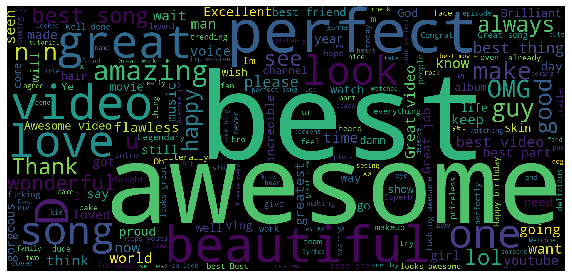

In [21]:
#ploting the wordcloud
plt.figure(figsize=(10,5))
plt.imshow(pos_wc)
plt.axis("off")

In [25]:
#similarly pulling all the -ve comments with polarity -1
neg_comments = comments[comments["polarity"]==-1]

In [26]:
neg_comments.head()

,video_id,comment_text,likes,replies,polarity
1387,ql0Op1VcELw,boring,0,0,-1.0
1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1,1,-1.0
1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1,0,-1.0
1793,F2uJvwiSZAQ,Thats insane.,0,0,-1.0


In [27]:
#joining the comments
total_neg_comments = ' '.join(neg_comments["comment_text"])

In [29]:
#creating the wordcloud
neg_wc = WordCloud(width=1900,height=900,stopwords=stopwords).generate(total_neg_comments)

(-0.5, 1899.5, 899.5, -0.5)

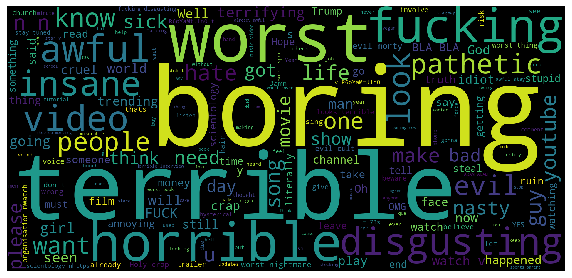

In [30]:
#ploting the wordcloud
plt.figure(figsize=(10,5))
plt.imshow(neg_wc)
plt.axis("off")

In [31]:
#reading another csv file for hashtags used
tag =pd.read_csv("USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [32]:
tag.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [33]:
#joing the hashtags as one big text
tags = ' '.join(tag["tags"])

In [34]:
#importing the regular expression library
import re

In [35]:
#cleaning the noise/symbols,etc.
tag = re.sub('[^a-zA-z]',' ',tags)

In [39]:
#removing extra spaces 
tag = re.sub(' +',' ',tag)

In [51]:
#creating the wordcloud of all the hashtags 
tag_wc = WordCloud(height=900,width=1900,stopwords=stopwords).generate(tag)

(-0.5, 1899.5, 899.5, -0.5)

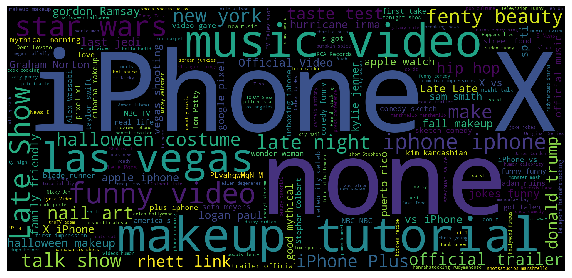

In [52]:
#ploting the wordcloud
plt.figure(figsize=(10,5))
plt.imshow(tag_wc)
plt.axis("off")

In [54]:
#reading the above csv as vid
vid = pd.read_csv("USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [57]:
vid.sample(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
3899,ufaDurSCKOk,Annihilation (2018) - Teaser Trailer - Paramou...,Paramount Pictures,1,Jeff VanderMeer|Southern Reach Trilogy|Natalie...,5520472,28421,2684,3508,https://i.ytimg.com/vi/ufaDurSCKOk/default.jpg,2.10
3865,Ap5hoCTkTUM,"Hold the Door! | Anwar Jibawi, Inanna Sarkis, ...",Anwar Jibawi,23,hold the door|anwar|jibawi|inanna|sarkis|hanna...,1986284,82241,2190,4372,https://i.ytimg.com/vi/Ap5hoCTkTUM/default.jpg,2.10
5610,P_X6hIyqUxA,Vikings vs. Bears | NFL Week 5 Game Highlights,NFL,17,NFL|Football|offense|defense|afc|nfc|American ...,594160,5052,272,1568,https://i.ytimg.com/vi/P_X6hIyqUxA/default.jpg,11.10
7627,M2Kwpy2ot6k,The Dump - Cyanide & Happiness Shorts,ExplosmEntertainment,23,shorts|c&hshorts|c&h shorts|c and h shorts|cya...,1251980,45262,3544,4007,https://i.ytimg.com/vi/M2Kwpy2ot6k/default.jpg,21.10
1367,AK3ST6HUOK0,Torched Out read by Harry Dean Stanton.,gusma28,24,bukowski|documentary|poem|harry|dean|stanton|t...,4651,24,0,2,https://i.ytimg.com/vi/AK3ST6HUOK0/default.jpg,19.09


In [62]:
#storing the views, likes and dislikes column in ld
ld = vid[["views","likes","dislikes"]]

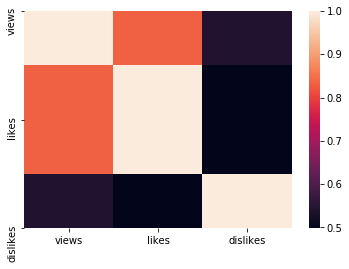

In [65]:
#this heatmap shows the correlation shows how these three vaiables are corelated to each other
sns.heatmap(ld.corr())

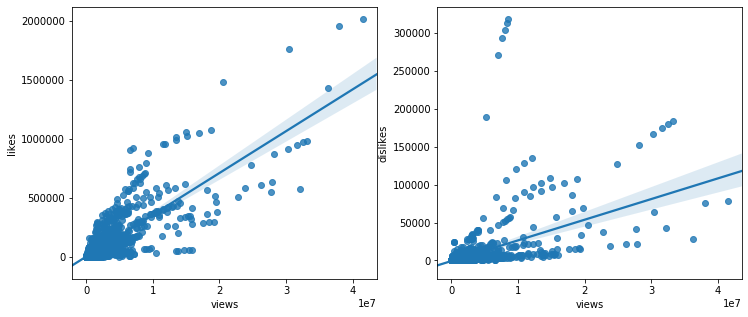

In [70]:
#creating a sublot of row=1,col=2 and 2 regression graphs on them
#1st- x=views, y=likes
#2nd- x=views, y=dislikes
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.regplot(data=vid,x="views",y="likes")
plt.subplot(122)
sns.regplot(data=vid,x="views",y="dislikes")